In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
data_path = "/home/maksim/Documents/data_art.csv"
data = pd.read_csv(data_path)

In [223]:
data = data[pd.notna(data.Image)]

In [224]:
data.reset_index(drop=True, inplace=True)

In [305]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import WebDriverException
import re

def download_images(data, path_to_save, driver_path):
    driver = webdriver.Firefox(executable_path=driver_path)
    driver.maximize_window()
    paths = []
    for url in data.Image:
        try:
            driver.get(url)
            WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.TAG_NAME, "img")))
            row = data[data.Image == url]
            suffix = str(row.Author.values[0]) + "," + str(row.Art.values[0]) + "," + str(row.year.values[0])
            if len(suffix) > 100:
                suffix = suffix[:100]
            filename = path_to_save + re.escape(suffix.replace("/",";"))
            with open(filename, 'wb') as file:
                file.write(driver.find_element_by_tag_name('img').screenshot_as_png)
            paths.append(filename)
        except WebDriverException:
            paths.append("None")
            continue
    driver.close()
    return paths

In [327]:
paths = download_images(data, path_to_save="/home/maksim/Art_Images/", driver_path="/home/maksim/geckodriver")

In [340]:
import pickle
data.to_pickle("/home/maksim/Documents/data_with_paths_2.pkl")

In [13]:
import pickle
unpickled_df = pd.read_pickle("/home/maksim/Documents/data_with_paths.pkl")

In [14]:
df = unpickled_df.drop_duplicates(subset=['Paths'])
df = df[(pd.notna(df.Paths)) & (df.Paths != "None")]

In [15]:
df.reset_index(drop=True, inplace=True)

In [23]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt


def print_image(path):
    image = cv2.imread(path)
    plt.imshow(image)
    plt.show()

In [17]:
def crop(image):
    image = image[1: image.shape[1] - 1, 1 : image.shape[0] - 1]
    height, width = image.shape[:2]
    u, d, l, r = 0, 0, 0, 0
    while(np.mean(image[:, l]) > 254):
        l += 1
    while(np.mean(image[:, width - r - 1]) > 254):
        r += 1
    while(np.mean(image[u]) > 254):
        u += 1
    while(np.mean(image[height - d - 1]) > 254):
        d += 1
    return image[u:height - d - 1,l: width - r - 1]
    

In [18]:
crop(cv2.imread(df.Paths[17]))

array([[[245, 250, 250],
        [241, 250, 250],
        [237, 249, 250],
        ...,
        [241, 250, 250],
        [238, 250, 250],
        [241, 250, 250]],

       [[180, 191, 191],
        [160, 177, 180],
        [156, 176, 181],
        ...,
        [161, 181, 189],
        [160, 177, 183],
        [168, 181, 184]],

       [[179, 192, 194],
        [158, 180, 185],
        [151, 180, 185],
        ...,
        [156, 180, 194],
        [156, 179, 185],
        [165, 181, 186]],

       ...,

       [[189, 201, 204],
        [170, 192, 198],
        [162, 190, 197],
        ...,
        [176, 195, 207],
        [175, 195, 203],
        [182, 196, 202]],

       [[190, 201, 203],
        [172, 191, 196],
        [165, 189, 195],
        ...,
        [174, 194, 208],
        [177, 195, 202],
        [185, 196, 202]],

       [[192, 200, 200],
        [176, 191, 194],
        [169, 188, 193],
        ...,
        [179, 194, 204],
        [183, 195, 201],
        [187, 196, 200]]

In [19]:
def crop_and_save_image(path):
    image = cv2.imread(path)
    new_image = crop(image)
    filename = "/home/maksim/Art_Images_cropped/" + path[path.rfind("/") + 1:] + ".jpg"
    cv2.imwrite(filename, new_image)
    return filename

In [20]:
paths_cropped = df.Paths.apply(crop_and_save_image)

In [21]:
import pickle
paths_cropped.to_pickle("/home/maksim/Documents/paths_cropped.pkl")

In [22]:
paths_cropped

0        /home/maksim/Art_Images_cropped/alberto\ giaco...
1        /home/maksim/Art_Images_cropped/alberto\ giaco...
2        /home/maksim/Art_Images_cropped/alberto\ giaco...
3        /home/maksim/Art_Images_cropped/alberto\ giaco...
4        /home/maksim/Art_Images_cropped/alberto\ giaco...
                               ...                        
12522    /home/maksim/Art_Images_cropped/zhang\ xiaogan...
12523    /home/maksim/Art_Images_cropped/zhang\ xiaogan...
12524    /home/maksim/Art_Images_cropped/zhang\ xiaogan...
12525    /home/maksim/Art_Images_cropped/zhang\ xiaogan...
12526    /home/maksim/Art_Images_cropped/zhou\ zhimian,...
Name: Paths, Length: 12527, dtype: object

In [31]:
del df['Paths']

In [39]:
df = df.join(paths_cropped)

In [43]:
import pickle
df.to_pickle("/home/maksim/Documents/Art_dataset")

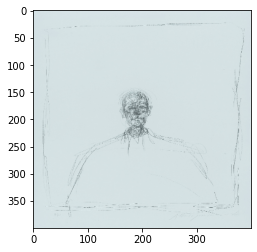

In [51]:
image = image = cv2.imread(df.Paths[3])
resized_image = cv2.resize(image, (400, 400)) 
plt.imshow(resized_image)
plt.show()

In [10]:
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(data, test_size=0.2)

# train_label = train_set["normalized_price"]
# test_label = test_set["normalized_price"]

# train_index = train_set[["Author", "Art"]]
# test_index = test_set[["Author", "Art"]]

# train_set = train_set.drop(columns=["Author", "Art"]).copy()
# test_set = test_set.drop(columns=["Author", "Art"]).copy()

In [11]:
# train_set.shape
# test_set.shape

(2908, 31)

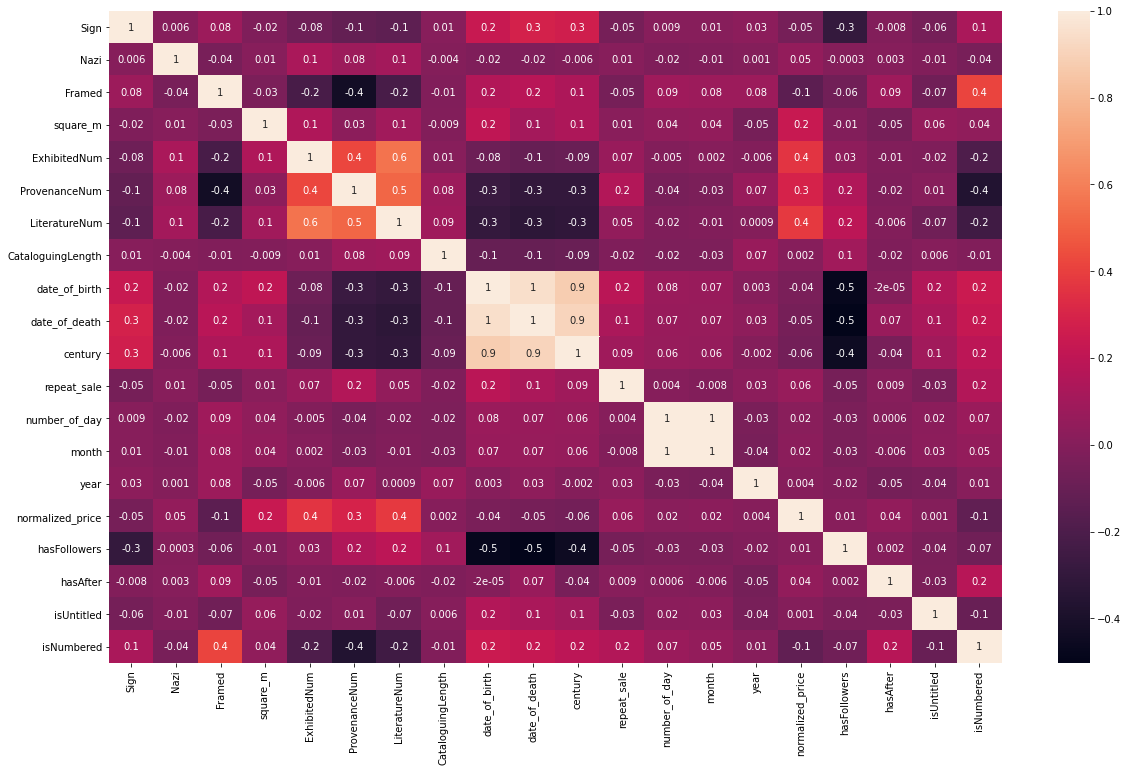

In [11]:
# fig, ax = plt.subplots(figsize=(20,12))
# sns.heatmap(train_set.corr(), annot = True, fmt='.1g')
# plt.show()

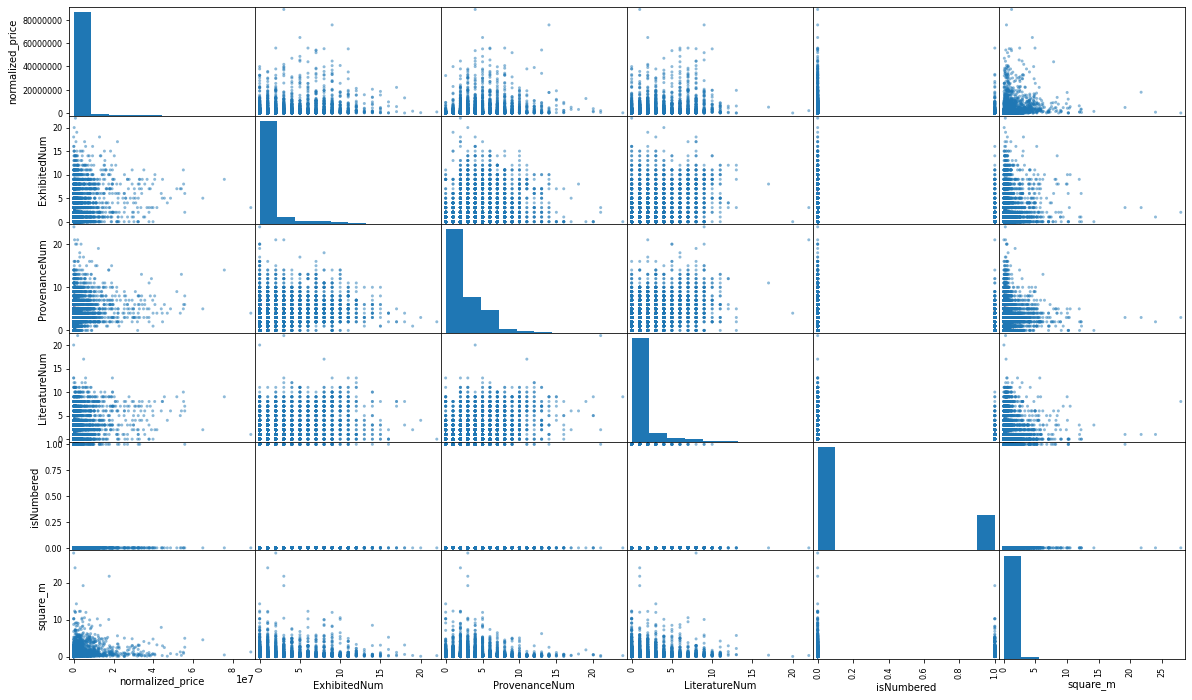

In [12]:
# from pandas.plotting import scatter_matrix
# attributes = ["normalized_price", "ExhibitedNum","ProvenanceNum","LiteratureNum","isNumbered","square_m"]
# scatter_matrix(train_set[attributes], figsize=(20, 12))
# plt.show()

In [12]:
# train_set = train_set.drop(columns=["normalized_price"]).copy()
# test_set = test_set.drop(columns=["normalized_price"]).copy()

# data_num = train_set.select_dtypes(include=['int64', 'float64'])
# data_cat = train_set.select_dtypes(include='object')

In [13]:
# from sklearn.base import BaseEstimator, TransformerMixin


# class CreateDummies(BaseEstimator, TransformerMixin):
#     def __init__(self,attrib = None):
#         pass
#     def fit(self, X):
#         return self
#     def transform(self, X):
#         self.attrib =  pd.get_dummies(pd.DataFrame(X)).columns
#         return pd.get_dummies(pd.DataFrame(X)).values

# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names].values


In [14]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

    
# num_pipeline = Pipeline([
# ('selector', DataFrameSelector(data_num.columns)),
# ('imputer', SimpleImputer(strategy="median")),
# ('std_scaler', StandardScaler()),
# ])

In [15]:
# cat_pipeline = Pipeline([
# ('selector', DataFrameSelector(data_cat.columns)),
# ('create_dummies', CreateDummies()),
# ])

In [16]:
# from sklearn.pipeline import FeatureUnion

# full_pipeline = FeatureUnion(transformer_list=[
# ("num_pipeline", num_pipeline),
# ("cat_pipeline", cat_pipeline),
# ])

In [17]:
# train_prepared = full_pipeline.fit_transform(data)
# label = data["normalized_price"]
# np.shape(train_prepared)

(14536, 226)

***Linear Regression***

In [146]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression

# lin_reg = LinearRegression()
# lin_reg.fit(train_prepared, train_label)

# scores = cross_val_score(lin_reg, train_prepared, train_label,
# scoring="neg_mean_squared_error", cv=10)
# lin_rmse_scores = np.sqrt(-scores)


In [147]:
# def display_scores(scores):
#     print("Scores:", scores)
#     print("Mean:", scores.mean())
#     print("Standard deviation:", scores.std())
# display_scores(lin_rmse_scores)

Scores: [7.55876931e+08 3.13225791e+09 2.03621600e+08 4.37357309e+09
 9.62396677e-01 6.82609634e+08 1.21401146e+08 2.08122342e+09
 1.69086482e+09 3.90537888e+08]
Mean: 1343196643.7414815
Standard deviation: 1390465727.6611133


In [167]:
# test_prepared = full_pipeline.fit_transform(test_set)

(2908, 202)

***Decision Tree***

In [148]:
# from sklearn.tree import DecisionTreeRegressor

# tree_reg = DecisionTreeRegressor()
# tree_reg.fit(train_prepared, train_label)

# scores = cross_val_score(tree_reg, train_prepared, train_label,
# scoring="neg_mean_squared_error", cv=10)
# tree_rmse_scores = np.sqrt(-scores)

In [149]:
# display_scores(tree_rmse_scores)

Scores: [1.42971964 1.6730285  1.50421863 1.40118025 1.6719771  1.62292472
 1.37570844 1.31384991 1.61150472 1.38930624]
Mean: 1.499341816095526
Standard deviation: 0.12811333480709863


***Random forest***

In [150]:
# from sklearn.ensemble import RandomForestRegressor

# forest_reg = RandomForestRegressor()
# forest_reg.fit(train_prepared, train_label)

# scores = cross_val_score(forest_reg, train_prepared, train_label,
# scoring="neg_mean_squared_error", cv=10)
# tree_rmse_scores = np.sqrt(-scores)

In [151]:
# display_scores(tree_rmse_scores)

Scores: [1.16915259 1.27758519 1.15816635 0.83179475 1.06762916 1.19785323
 1.0365943  1.07870518 1.23480087 0.96337544]
Mean: 1.1015657055525139
Standard deviation: 0.12788505356163649


In [152]:
# feature_importances = forest_reg.feature_importances_

# num_attribs = list(data_num)

# cat_attribs = list(cat_pipeline.named_steps["create_dummies"].attrib)
# attributes = num_attribs + cat_attribs
# sorted(zip(feature_importances, attributes), reverse=True)

[(0.16461912947637627, 'square_m'),
 (0.1411574433063561, 'ProvenanceNum'),
 (0.07378213023019406, 'ExhibitedNum'),
 (0.07016332871760417, 'LiteratureNum'),
 (0.06314596522877157, 'year'),
 (0.03613288658857099, 'number_of_day'),
 (0.0320701625609307, '1_paper'),
 (0.027199920437284534, '1_canvas'),
 (0.022152412085903916, 'date_of_death'),
 (0.02128471400891818, 'date_of_birth'),
 (0.01562292098742307, '10_23:00'),
 (0.014108408586697218, '10_24:00:00'),
 (0.01355375648949775, 'month'),
 (0.013465918307077074, '0_lithograph'),
 (0.012613414576540886, '0_oil'),
 (0.01151543032889496, '3_hong kong'),
 (0.011062553605720891, '4_Spaniard'),
 (0.010405881817892768, '6_modern'),
 (0.010192334006679304, '8_homosexual'),
 (0.009836260061472389, 'hasAfter'),
 (0.009353412369003286, '9_Monday'),
 (0.00898382308390053, 'Sign'),
 (0.008006900119673132, '6_expressionism'),
 (0.0067514022604676345, '9_Wednesday'),
 (0.006612050681629079, '10_18:00'),
 (0.006378807194191896, '4_Norwegian'),
 (0.0063

***Ridge Regression***

In [25]:
# from sklearn.linear_model import Ridge

# ridge_reg = Ridge(alpha=1, solver="cholesky")
# ridge_reg.fit(train_prepared, train_label)

# scores = cross_val_score(ridge_reg, train_prepared, train_label,
# scoring="neg_mean_squared_error", cv=10)
# ridge_rmse_scores = np.sqrt(-scores)

In [26]:
# display_scores(ridge_rmse_scores)

Scores: [1.07497749 1.27297469 0.72544365 1.05334572 1.17606448 1.10529698
 1.39932078 0.9614816  1.15795335 1.17170462]
Mean: 1.1098563358118876
Standard deviation: 0.1717958852239228


***Lasso Regression***

In [27]:
# from sklearn.linear_model import Lasso
# lasso_reg = Lasso(alpha=0.1)
# lasso_reg.fit(train_prepared, train_label)

# scores = cross_val_score(lasso_reg, train_prepared, train_label,
# scoring="neg_mean_squared_error", cv=10)
# lasso_rmse_scores = np.sqrt(-scores)

In [28]:
# display_scores(lasso_rmse_scores)

Scores: [1.1736165  1.34448233 0.85329867 1.13182663 1.24641415 1.15315233
 1.45380138 1.04526695 1.2394662  1.25066339]
Mean: 1.1891988530332038
Standard deviation: 0.15559074393811761


***Elastic Net***

In [29]:
# from sklearn.linear_model import ElasticNet
# elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
# elastic_net.fit(train_prepared, train_label)

# scores = cross_val_score(elastic_net, train_prepared, train_label,
# scoring="neg_mean_squared_error", cv=10)
# elastic_rmse_scores = np.sqrt(-scores)

In [30]:
# display_scores(elastic_rmse_scores)

Scores: [1.14776572 1.33644002 0.82104823 1.11016797 1.2206884  1.13508588
 1.4427708  1.02555058 1.21740778 1.23389104]
Mean: 1.1690816434444768
Standard deviation: 0.16091079507367248


In [31]:
# import dill
# dill.dump_session('Coursework_ml.db')

In [2]:
# import dill
# dill.load_session('/home/maksim/datasets/Coursework_ml.db')

***Support Vector Poly Regression***

In [2]:
# from sklearn.svm import SVR
# svm_poly_reg = SVR(kernel="poly", degree=2, C=1, epsilon=0.1)

# scores = cross_val_score(svm_poly_reg, train_prepared, train_label,
# scoring="neg_mean_squared_error", cv=10)
# svm_rmse_scores = np.sqrt(-scores)

In [3]:
# display_scores(svm_rmse_scores)

Scores: [1.06511734 1.20258506 0.6693346  1.05498367 1.22027597 1.0730073
 1.42152522 0.94912541 1.14347622 1.16506589]
Mean: 1.0964496689129901
Standard deviation: 0.1861649478892823


***Support Vector Linear Regression***

In [3]:
# from sklearn.svm import LinearSVR
# svm_reg = LinearSVR(epsilon=1.5,max_iter=7600)

# scores = cross_val_score(svm_reg, train_prepared, train_label,
# scoring="neg_mean_squared_error", cv=10)
# svm_rmse_scores = np.sqrt(-scores)

In [4]:
# display_scores(svm_rmse_scores)

Scores: [1.12244355 1.27988017 0.78200359 1.09685108 1.21380958 1.12867875
 1.43311805 1.01352729 1.19923026 1.20899892]
Mean: 1.147854124809474
Standard deviation: 0.16280040435735146


**Boost**

In [13]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error

# X_train, X_val, y_train, y_val = train_test_split(train_prepared, train_label)

# gbrt = GradientBoostingRegressor(n_estimators=600, 
#     max_depth=5, 
#     learning_rate=0.01, 
#     min_samples_split=3)

# gbrt.fit(X_train, y_train)

# errors = [mean_squared_error(y_val, y_pred)
# for y_pred in gbrt.staged_predict(X_val)]
# bst_n_estimators = np.argmin(errors)
# gbrt_best = GradientBoostingRegressor(n_estimators=bst_n_estimators, 
#     max_depth=5, 
#     learning_rate=0.01, 
#     min_samples_split=3)

In [14]:
# scores = cross_val_score(gbrt_best, train_prepared, train_label,
# scoring="neg_mean_squared_error", cv=10)
# gbrt_rmse_scores = np.sqrt(-scores)
# display_scores(gbrt_rmse_scores)

Scores: [1.08107954 1.36989044 0.77011465 1.07903118 1.18911345 1.18567624
 1.36426542 0.98098843 1.17377697 1.16417646]
Mean: 1.1358112766309565
Standard deviation: 0.16687769248018233


In [19]:
# import torch
# train_prepared.shape

(14536, 226)

In [20]:
# class RegressionNet(torch.nn.Module):
#     def __init__(self, n_hidden_neurons):
#         super(RegressionNet, self).__init__()
#         self.fc1 = torch.nn.Linear(226, n_hidden_neurons)
#         self.act1 = torch.nn.functional.relu
#         self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
#         self.act2 = torch.nn.functional.relu
#         self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
#         self.act3 = torch.nn.functional.relu
#         self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)
#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.act1(x)
#         x = self.fc2(x)
#         x = self.act2(x)
#         x = self.fc3(x)
#         x = self.act3(x)
#         x = self.fc4(x)
#         return x
    
# net = RegressionNet(200)

In [21]:
# optimizer = torch.optim.Adam(net.parameters(), lr=0.01)


In [22]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train_prepared, np.log10(label), test_size=0.33)

# X_train = torch.Tensor(X_train)
# y_train = torch.Tensor(y_train.values)

# X_test = torch.Tensor(X_test)
# y_test = torch.Tensor(y_test.values)


# test_loss_history = []

# train_loss_history = []

# batch_size = 500



# def loss(pred, target):
#     return (torch.abs(pred - target)).mean()

# for epoch in range(2000):
#     order = np.random.permutation(len(X_train))
#     for start_index in range(0, len(X_train), batch_size):
#         optimizer.zero_grad()
        
#         batch_indexes = order[start_index:start_index+batch_size]
        
#         x_batch = X_train[batch_indexes]
#         y_batch = y_train[batch_indexes]
        
#         preds = net.forward(x_batch) 
        
#         loss_value = loss(preds, y_batch)
#         loss_value.backward()
        
#         optimizer.step()
    
#     if epoch % 100 == 0:
#         print(loss_value)
#         test_preds = net.forward(X_test)
#         train_preds = net.forward(X_train)
#         test_loss_history.append(loss(test_preds, y_test))
#         train_loss_history.append(loss(train_preds, y_train))


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


tensor(inf, grad_fn=<MeanBackward0>)
tensor(inf, grad_fn=<MeanBackward0>)
tensor(inf, grad_fn=<MeanBackward0>)
tensor(0.7222, grad_fn=<MeanBackward0>)
tensor(inf, grad_fn=<MeanBackward0>)
tensor(inf, grad_fn=<MeanBackward0>)
tensor(0.7280, grad_fn=<MeanBackward0>)
tensor(0.7922, grad_fn=<MeanBackward0>)
tensor(inf, grad_fn=<MeanBackward0>)
tensor(0.6985, grad_fn=<MeanBackward0>)
tensor(inf, grad_fn=<MeanBackward0>)
tensor(0.7418, grad_fn=<MeanBackward0>)
tensor(inf, grad_fn=<MeanBackward0>)
tensor(inf, grad_fn=<MeanBackward0>)
tensor(inf, grad_fn=<MeanBackward0>)
tensor(inf, grad_fn=<MeanBackward0>)
tensor(0.7616, grad_fn=<MeanBackward0>)
tensor(0.7357, grad_fn=<MeanBackward0>)
tensor(0.7516, grad_fn=<MeanBackward0>)
tensor(0.7976, grad_fn=<MeanBackward0>)
